# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [79]:
#does both load_csv() and str_column_to_float()
def load_csv(file):
    x = []
    y = []
    for line in file:
        x.append(float(line.split(',')[0]))
        y.append(float(line.split(',')[1]))
    return x, y

In [80]:
x, y = load_csv(open('insurance.csv'))

In [81]:
dataset = []
for i in range(len(x)):
    dataset.append([x[i], y[i]])

In [82]:
def mean(values):
    return sum(values) / float(len(values))

In [83]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [84]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [85]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [86]:
import random
def split_train_test(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]
        
    

In [87]:
train_set, test_set = split_train_test(dataset, 0.6)

In [88]:
from math import sqrt

In [89]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [90]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        ypred = b0 + b1 * row[0]
        predictions.append(ypred)
    return predictions

In [96]:
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return predicted, rmse

In [97]:
predictions, rmse = evaluate_algorithm(dataset, simple_linear_regression)

[388.68743024628236, 84.85713340037577, 64.37419203997757, 443.30860720734427, 156.54742816176946, 214.5824286828977, 98.51242764064123, 67.78801560004393, 173.6165459621013, 54.13272135977847, 37.06360355944664, 183.8580166423004, 57.54654491984484, 98.51242764064123, 43.89125067957937, 26.82213287924754, 101.92625120070761, 40.47742711951301, 30.23595643931391, 98.51242764064123, 40.47742711951301, 50.71889779971211, 50.71889779971211, 30.23595643931391, 118.99536900103944, 43.89125067957937, 33.64977999938027, 88.27095696044213, 43.89125067957937, 33.64977999938027, 19.99448575911481, 105.34007476077397, 40.47742711951301, 37.06360355944664, 95.09860408057487, 57.54654491984484, 228.23772292316318, 60.96036847991121, 33.64977999938027, 74.61566272017667, 64.37419203997757, 224.82389936309679, 159.96125172183582, 146.30595748157037, 207.75478156276498, 159.96125172183582, 57.54654491984484, 112.1677218809067, 47.30507423964574, 30.23595643931391, 78.02948628024305, 64.37419203997757,

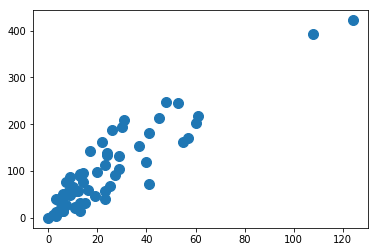

In [98]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha = 1, s = 100)
plt.show()

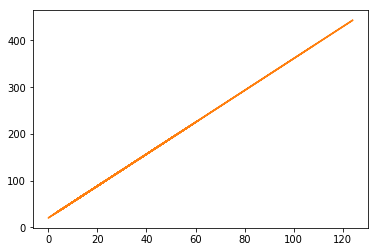

In [102]:
plt.plot(x, predictions)
plt.show()

In [100]:
print(rmse)

35.365829968791466
